 ### Import necessary libraries

In [37]:
#  import necessary libraries

import numpy as np  
import pandas as pd  
import matplotlib      
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(14,10)
matplotlib.rcParams['figure.facecolor']= '#00000000'


import plotly.io as pio
pio.renderers.default='notebook'

### Import dataset

In [38]:
# Import dataset
diabetes_df = pd.read_csv(r"/Users/neha/Desktop/diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Exploratory Data Analysis

In [39]:
diabetes_df.shape

(100000, 9)

The data contains 100,000 rows and 9 columns

In [40]:
# let's have a look at the columns of the data
list(diabetes_df.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [41]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None of the 9 columns contain null values.

In [42]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


The mean age of 42 seems reasonable, since those who report to hospital with diabetes related complications are usually middle-aged persons. However, the minimum age of 0.08 looks strange, and we will investiagte that later on 


The 'hypertension', 'heart_disease' and the 'diabetes' columns may contain binary data(0s and 1s). we will explore each of them later on



In [43]:
diabetes_df.duplicated().sum()

3854

There are 3854 duplicate rows of data. 
I will drop the duplicated rows

In [44]:
diabetes_df=diabetes_df.drop_duplicates()

In [45]:
diabetes_df.duplicated().sum()

0

#### diabetes colum(target column)

In [46]:
diabetes_df.diabetes.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

The diabetes column contains two values, 0 and 1.
0 for those who dont have diabetes and 1 for those who have diabetes

In [47]:
# percentage distribution of diabetes column
diabetes_df.diabetes.value_counts(normalize=True)*100

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64

The dataset is quite imbalanced. 
About 91% of the patients do not have diabetes, while 9% have been diagnosed with diabetes. We will consider this factor when measuring the model performance

let's view the distribution of the data with a barplot

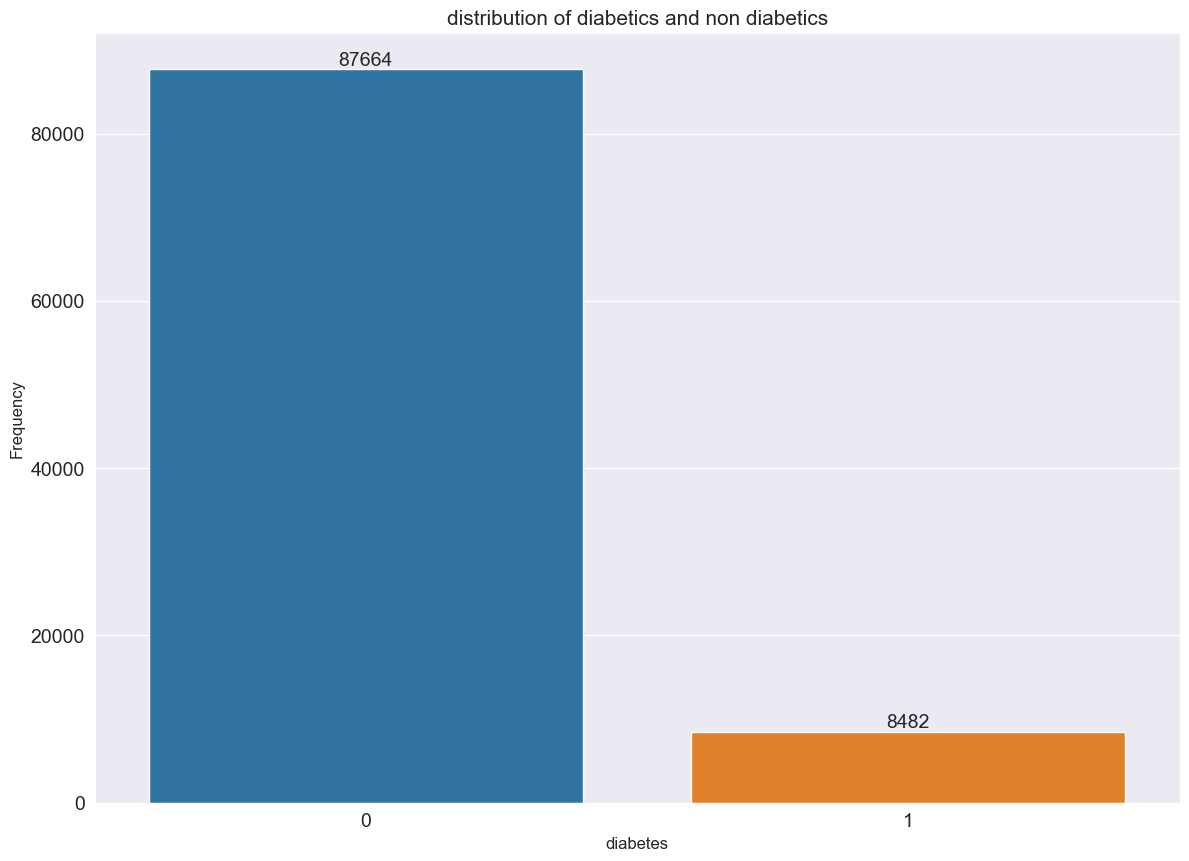

In [48]:
ax = sns.countplot(x=diabetes_df.diabetes)
plt.title('distribution of diabetics and non diabetics', fontsize=15)
plt.xlabel('diabetes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

#### Gender column

In [49]:
diabetes_df.gender.nunique()

3

there are 3 unique genders in the data

In [50]:
diabetes_df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

The patients identify as either 'Female', 'Male', or 'Other'.

let's view the distribution of the various genders

In [51]:
# distribution of gender
diabetes_df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [52]:
# percentage distribution of gender among the studied population
# diabetes_df.gender.value_counts()*100/len(diabetes_df
diabetes_df.gender.value_counts(normalize=True)*100

gender
Female    58.412206
Male      41.569072
Other      0.018722
Name: proportion, dtype: float64

About 58% are 'Female', 42% are 'Male' and close to 0%(18 out of 96,146) identify as 'Other'

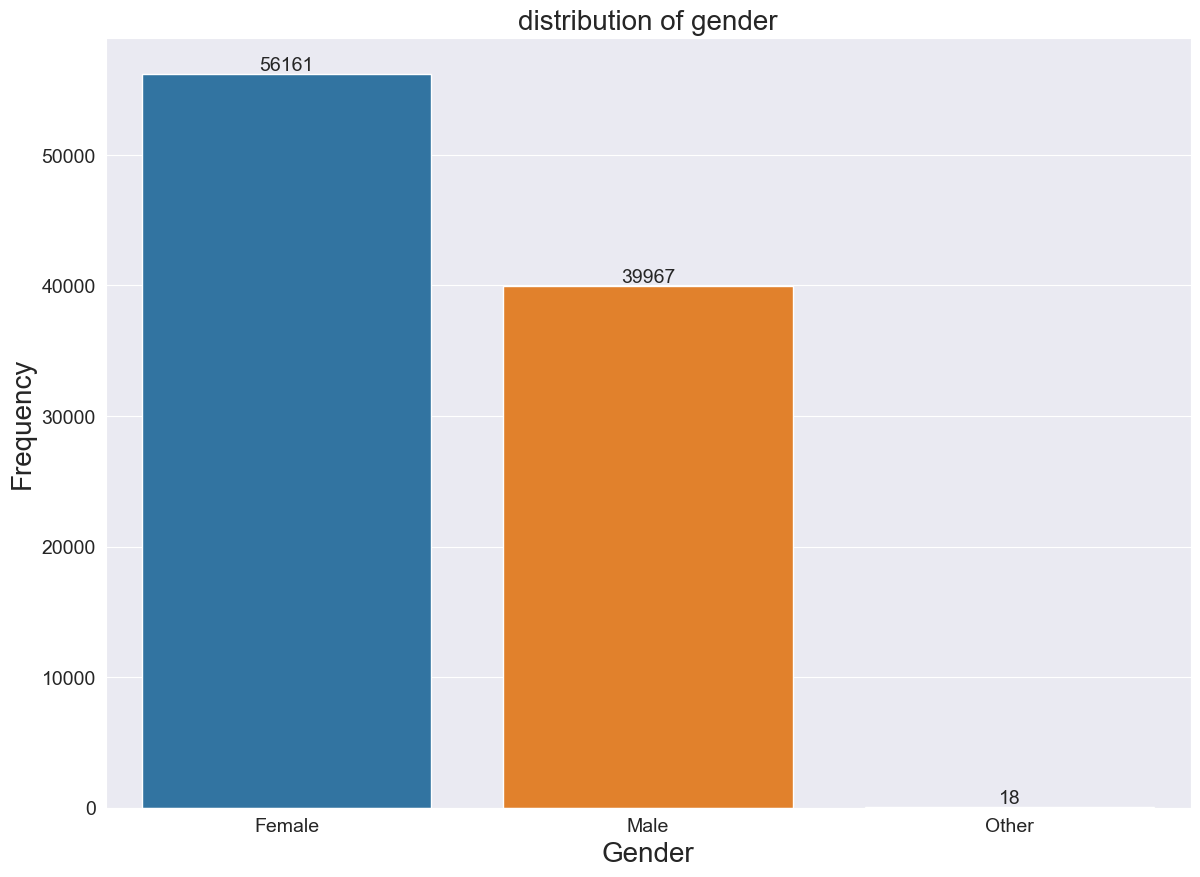

In [53]:
# distribution of gender within the studied population
ax = sns.countplot(diabetes_df, x='gender')
plt.title('distribution of gender', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,);

AttributeError: 'numpy.int64' object has no attribute 'startswith'

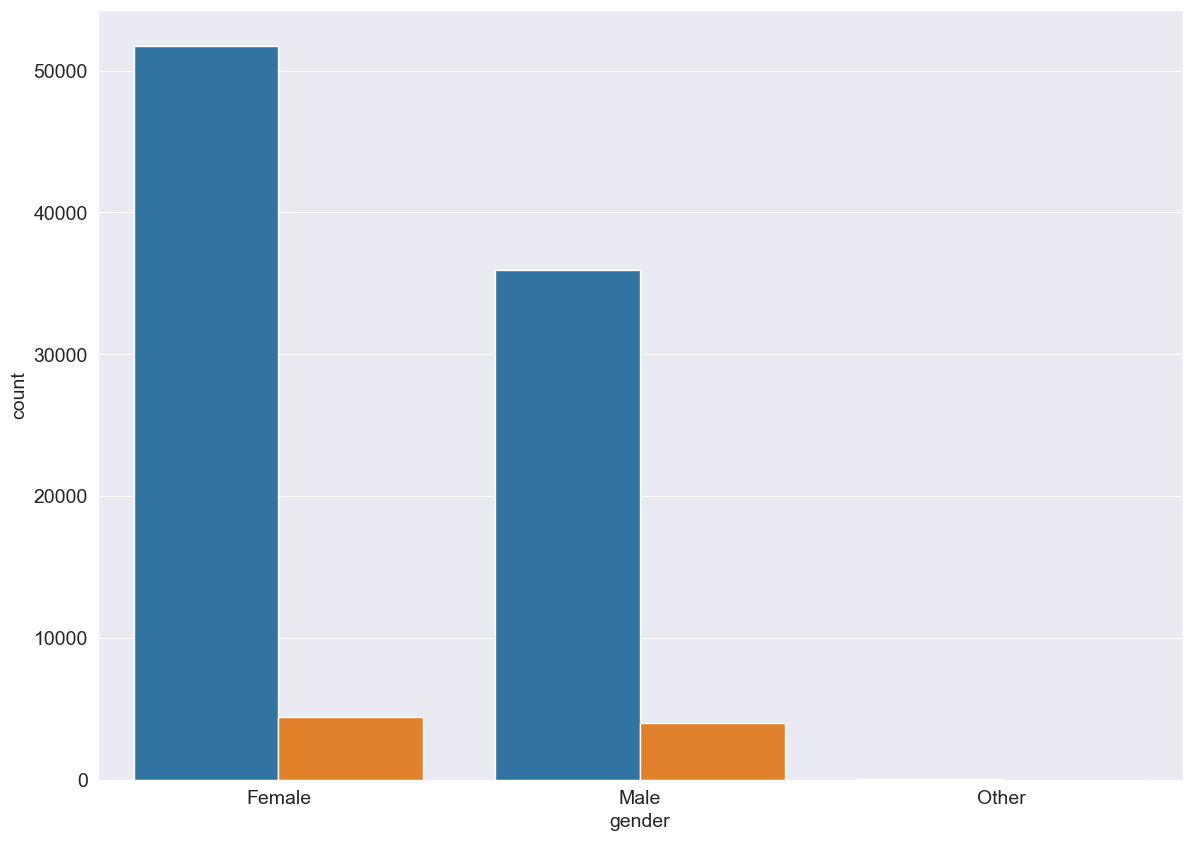

In [54]:
# distribution on of non-diabetic and diabeteic patients among the various genders
ax = sns.countplot(diabetes_df, x='gender', hue="diabetes")
plt.title('distribution of non-diabetic and diabetic patients among gender', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

#### Age column

In [ ]:
diabetes_df.age.describe()

The minimum age is 0.08. let's view the unique ages in ascending order to investigaet why age is in decimal

In [ ]:
np.sort(diabetes_df.age.unique())

The ages in decimals may refer to months, where 1 month old equals 0.08yrs(1/12), 2 months old:0.16(2/12), 3 months:0.24(3/12).

In [ ]:
# let's view the frequencies of the ages
diabetes_df.age.value_counts()

In [ ]:
# age distribution of the population studied
sns.countplot(x='age', data=diabetes_df)
plt.xticks(rotation=90)
plt.title('Age distribution of the population', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20);

Patients who are less than 2 years old have a significantly lower representaion in the study. 

On average, after age 2, there is a slightly upward trend in representation up to age 62 before declining gently up to age 79

The maximum age(80) alone accounts for more than 5% of the population. May be, the 80 actaully stands for 80 and above.

In [ ]:
# distribution of age
fig=px.histogram(diabetes_df, 
                 x='age', 
                 color='diabetes',
                 marginal='box', 
                 nbins=90, 
                 title=('age distribution'))
fig.update_layout(bargap=0.1, title_x=.5)
fig.show()

The ages of the patients with diabetes are skewed to the left; there a couple of outliers at the left whisker of the upper boxplot. From the histogram, 'older' people are more likely to be diagnosed with diabetes than 'younger' people.

In [ ]:
# what is the age of the youngest person to have been diagnosed with diabetes?
diabetes_df[diabetes_df.diabetes==1].sort_values(by='age', ascending=True)

The age of the youngest person to have been diagnosed with diabetes was just 3 years old.

#### Hypertension

In [ ]:
# distribution of hypertension

diabetes_df.hypertension.value_counts()

In [ ]:
# percentage distribution of hypertension

diabetes_df.hypertension.value_counts(normalize=True)*100

In [ ]:
# distribution of hypertension on barchart
ax = sns.countplot(x='hypertension', data=diabetes_df)
plt.title('distribution of hypertension', fontsize=20)
plt.xlabel('hypertension', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,);


In [ ]:
# distribution of diabetic and no diabetic patients among 'hypertension'
ax = sns.countplot(x='hypertension', data=diabetes_df, hue='diabetes')
plt.title('distribution of hypertension', fontsize=20)
plt.xlabel('hypertension', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

A person who is hypertensive is more likely to have diabetes than those who are not hypertensive

#### heart_disease

In [ ]:
# distribution of heart_disease
diabetes_df.heart_disease.value_counts()

In [ ]:
# percentage distribution of heart_disease
diabetes_df.heart_disease.value_counts()*100/len(diabetes_df)

In [ ]:
# distribution of heart_disease on a graph
ax = sns.countplot(x='heart_disease', data=diabetes_df)
plt.title('distribution of heart_disease', fontsize=20)
plt.xlabel('heart_disease', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,);

In [ ]:
# distribution of diabetic and no diabetic patients among 'heart_disease'
ax = sns.countplot(x='heart_disease', data=diabetes_df, hue='diabetes')
plt.title('distribution of heart_disease', fontsize=20)
plt.xlabel('heart_disease', fontsize=20)
plt.ylabel('Frequency', fontsize=20);
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

A person who has heart  disease is more likely to have diabetes than those who do not have heart disease

#### smoking_history

In [ ]:
# number of unique entries in the 'smoking_history' column
diabetes_df.smoking_history.nunique()

In [ ]:
# unique entries in the 'smoking_history' column
diabetes_df.smoking_history.unique()

In [ ]:
# distribution of smoking_history column
diabetes_df.smoking_history.value_counts()

In [ ]:
# percentage distribution of smoking_history column
diabetes_df.smoking_history.value_counts(dropna=False, normalize=True)*100

In [ ]:
# distribution of smoking_history column on graph
ax = sns.countplot(x='smoking_history', 
              data=diabetes_df, 
              order=diabetes_df['smoking_history'].value_counts(ascending=False).index)
plt.title('distribution of smoking history', fontsize=20)
plt.xlabel('smoking history', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
for i in ax.containers:
    ax.bar_label(i,);

In [ ]:
# distribution of diabetic and no diabetic patients among 'smoking_history'
ax = sns.countplot(x='smoking_history', 
              data=diabetes_df, 
              hue='diabetes', 
              order=diabetes_df['smoking_history'].value_counts(ascending=False).index)
plt.title('distribution of smoking history', fontsize=20)
plt.xlabel('smoking history', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

Patients whose smoking history is 'former' are more likely to be diabetic than the other categories in the smoking history column

#### BMI

BMI stands for body mass index. A person's bmi is found by dividing body weigth in kilograms by height in meters squared

* bmi below 18.5 is deemed under weight
* 18.5-24.9 is healthy weight
* 25-29.9 is overweight
* 30 and above is obesity

In [ ]:
diabetes_df.bmi.describe()

In [ ]:
# distribution of bmi
fig=px.histogram(diabetes_df,
                x='bmi',
                 nbins=100,
                marginal='box',
                color='diabetes',
                color_discrete_sequence=['blue', 'grey'],
                title='bmi distribution')
fig.update_layout(bargap=0.1, title_x=0.5)
fig.show()


The bmi of patients with diabetes is skewed to the right, with a higher median than those without diabetes. 

Persons with higher bmi are more likely to have diabetes than those with lower bmi

There seems to be a lot of outliers in the bmi across the entire dataset

#### HbA1c level

HbA1c stands for Glycohemoglobin A1c. A person's HbA1c level is the average blood glucose level of that person over the past three months

* HbA1c level less than 5.7% is considered as normal
* between 5.7-6.4% is considered to be prediabetic
* while HbA1c level higher than 6.4% is considered to be diabetic

In [ ]:
diabetes_df.HbA1c_level.describe()

In [ ]:
# distribution of HbA1c_level
fig=px.histogram(diabetes_df,
                x='HbA1c_level',
                 nbins=7,
                marginal='box',
                color='diabetes',
                color_discrete_sequence=['blue', 'grey'],
                title='HbA1c level distribution')
fig.update_layout(bargap=0.1, title_x=0.5)
fig.show()


From the histogram, and the boxplots, the HbA1c_level isnt much different from the age and bmi in a sense that, patients with higher HbA1c levels are more likely to have diabetes than patients with lower HbA1c levels. 

The boxplot of patients who have diabetes(upper boxplot) has a higher median, signifying a more likelyhood of having diabetes 

However, the HbA1c_level does not seem to contain outliers

#### Blood Glucose Level

Blood glucose level refers to the amount of glucose in the blood at the time of the test

the normal blood glucose level depends on many factors, such as 
* whether one is fasting or not
* time of the day
* number of hours since last ate

In [ ]:
diabetes_df.blood_glucose_level.describe()

In [ ]:
# distribution of blood glucose level
fig=px.histogram(diabetes_df,
                x='blood_glucose_level',
                 nbins=10,
                marginal='box',
                color='diabetes',
                color_discrete_sequence=['blue', 'grey'],
                title='distribution of blood glucose level')
fig.update_layout(bargap=0.1, title_x=0.5)
fig.show()

#### observations from the exploratory analysis

**Age**
* 'Older' people are more likely to be diagnosed with diabetes than 'younger' people.

**Smoking-history**
* The number of missing values(No Info) in the smoking_history column is quite significant: 34%
* patients whose smoking history is 'former' are more likely to be diabetic than the other categories in the smoking history column
**bmi**
* Patients with higher bmi are more likely to have diabetes than those with lower bmi

**HbA1c_level**
* Patients with higher HbA1c levels are more likely to have diabetes than patients with lower HbA1c levels. 


**Blood Glucose level**
* Blood glucose level has a positive relationship with likelyhood of having diabetes. Patients with higher blood glucose levels are more likely to have diabetes than patients with lower blood glucose level. 

**outliers**
* we have also seen that, the age, bmi and HbA1c_level may contain outliers

### Splitting data for model training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# set 20% as test data, save remaining for training and validation
train_and_val_df, test_df = train_test_split(diabetes_df, test_size=.2, random_state=42)

# split train_and_val_df into training and validation sets
train_df, val_df = train_test_split(train_and_val_df, test_size=.25, random_state=42)


In [ ]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

In [ ]:
# training dataframe
train_df

In [ ]:
# validation dataframe
val_df

In [ ]:
# test dataframe
test_df

##### input and target columns

In [ ]:
# input columns
input_cols = list(diabetes_df.columns)[0:-1]
input_cols

In [ ]:
# target column
target_col=['diabetes']

In [ ]:
# let's create input  and target dataframes for the training, validations and test sets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

**numeric and categorical coumns**

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

In [ ]:
categorical_cols

In [ ]:
diabetes_df.info()

non of our columns contain missing values, so we dont need to make any imputation

### scaling

In [ ]:
diabetes_df.describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### encoding categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
# let's take a look at out train_inputs dataframe
train_inputs

In [ ]:
# let's view our numeric columns(numeric and encoded categorical columns)
print(numeric_cols + encoded_cols)

In [ ]:
# extracting only numeric columns from the dataframes

x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

### Training a decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(x_train, train_targets)

**making predictions**

In [ ]:
#  making predictions with the training set
train_preds = model.predict(x_train)
train_preds

In [ ]:
#  making predictions with the test set
test_preds = model.predict(x_test)
test_preds

#### visualizating decision trees

 we can visualise the decision tree learned from the training data

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
#  visualizing the decision tree model, truncated after a depth of 3
plt.figure(figsize=(18,12))
classes = ['No diabetes','diabetes']
plot_tree(model, feature_names=x_train.columns, max_depth=3, class_names = classes, filled=True);

we can also display the tree as text

In [ ]:
tree_text = export_text(model, max_depth=5,feature_names=list(x_train.columns))
print(tree_text)

# try code with print(tree_text)

#### Feature Importance

Based on the Gini index computations, a decision tree assigns an 'importamnce' value to each feature. These 'importances' can be used to interprete the results given by a decision tree

In [ ]:
model.feature_importances_

let's view the importances of the features in a dataframe

In [ ]:
feature_importance_df = pd.DataFrame({'feature': x_train.columns,
                             'importance': model.feature_importances_}).sort_values('importance', ascending=False)
feature_importance_df

HbA1c Level is the most 'important' feature in predicting whether a person has diabetes or not. It is the feature that is most associated with the target variable

In [ ]:
# feature importance on a bar plot
plt.figure(figsize=(14,10))
plt.title('feature importance')
plt.xticks(rotation=90)
sns.barplot(data=feature_importance_df, y='importance', x='feature');

### Evaluating the model

Earlier, we saw that our data is imbalanced; 91% diabetics and 9% non-diabetic
Due to this, 'accuracy score' may not be a good measure of model performance

The following metrics will be used in assessing the model performance:

1. confusion matrix
2. precision
3. recall
4. F1-score

**Confusion matrix**

A confusion matrix is a useful tool to evaluate the performance of a classification model by mapping its actual and predicted values. In binary classification tasks, it is a table that shows four prediction outcomes: True Positives, True Negatives, False Positives and False Negatives.

The words 'positive' and 'negetive' refer to the target and non target class. In this classification, class "1"(diabetic) is our target class and we refer to patients classified under class "1" as positive. class 0 is the non target class(non diabeteic)

The four prediction outcomes of a binary classifier are explained below

1. True Positives (TP): observations that are predicted as positive, and they are actually positive
2. True Negatives (TN): observations that are predicted as negetive, and they are actually negative
3. False Positives (FP): observations that are wrongly predicted as positive, but they are negative
4. False Negatives (FN): observations that are wrongly predicted as negative, but they are positive


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# confusion matrix for the decision tree predictions

cm_matrix = confusion_matrix(test_targets, test_preds)
cm_matrix

In [ ]:
# view of the confusion matrix on a heatmap
plt.figure(figsize=(14,10))
heatmap=sns.heatmap(cm_matrix, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("confusion matrix for decision tree")
heatmap;

The confusion matrix summerises the predictions made by the model

* **True positives** = Patients who have diabetes and the model also correctly predicted as having diabetes = **1277**
* **True negetives** = Patients who do not have diabetes and the model also correctly predicted as not having diabetes = **16962**
* **False negetives** = Patients who have diabetes but the model wrongly predicted as not having diabetes = **444**
* **False positives** = Patients who do not have but the model predicted as having diabetes = **547**

* The total number of correct predictions by our model = TP+TN = 1,277+16,962=**18,239**
* The total number of incorrect predictions by our model = FN+FP = 444+547=**991**
* The sum of the numbers in all the boxes gives the total number of samples evaluated: **19,230**

**Precision**

Precision shoes how often the model is right when it predicts the target class. It is the number of true positive outcomes divided by the sum of all positive predictions

Precision = TP/(TP +FP)

In [ ]:
precision = 1277/(1277+547)
print("precision:", precision)

**recall(True positive rate)**

Recall is also called 'True Positive rate'. It is the percentage of accurately predicted positives out of all actual positive samples in the dataset

recall = TP/(TP+FN)

In [ ]:
recall = 1277/(1277+444)
print("recall:", recall)

**F1-score**

F1-score is described as the harmonic mean of the precision and recall of a classification model.

f1-score = (2\*precision\*recall)/(precision + recall)

In [ ]:
f1_score = (2*precision*recall)/(precision + recall)
print("f1_score:", f1_score)

#### Choosing the appropriate metric for measurering model performance

Choosing the appropriate metric for measuring model performance may depend on the specific application. In the case of diabetes prediction, recall may be the prefered metric. 

Recall answers the question 'If 100 diabetic people visit a health facility, how many, out of the 100 people, can the model correctly predict as being diabetic?. If recall is 0.9, it means the model is able to correctly predict 90%(90 out of 100) of the diabetes patients.

The recall metric is about finding all positive cases, catching as many positive cases as possible, even at the expense of more false positives. 
Recall is a good metric when the cost of a false negetive is high. False negetives are those who have diabetes but the model couldnt 'catch' them as having diabetes.


Precision is a good metric when the cost of false positive is high

F1-score is the average of recall and precision

### Checking for overfitting and underfitting

In [ ]:
# confusion_matrix for the training set
train_cm_matrix = confusion_matrix(train_targets, train_preds)
train_cm_matrix

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(train_cm_matrix, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("confusion matrix for training set");

In [ ]:
# training set recall
# we can use the recall_score metric from sklearn to compute for recall

from sklearn.metrics import recall_score

In [ ]:
train_recall = recall_score(train_targets, train_preds)
print('training set recall:', train_recall)

In [ ]:
# test set recall from the initial computation
print('test set recall:', recall)

Our training set recall is 0.994 while that of the test set is 0.742
There is likely an issue of overfitting

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = { 'max_depth': [2,4,6,8,10,12],
             'min_samples_split': [2,3,4],
             'min_samples_leaf': [1,2,3]}

dec_tree_model = DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:9})
gcv =  GridSearchCV(estimator=dec_tree_model, param_grid=parameter, scoring='recall', cv=5)
gcv.fit(x_train, train_targets)



In [ ]:
# best parameters
gcv.best_params_

In [ ]:
# best model
gcv.best_estimator_

In [ ]:
# we store the best model in 'prunned_model'
prunned_model = gcv.best_estimator_

# here, we use the best decision tree for training our data
prunned_model.fit(x_train, train_targets)

# making predictions
x_train_preds= prunned_model.predict(x_train)
x_val_preds = prunned_model.predict(x_val)
x_test_preds = prunned_model.predict(x_test)

In [ ]:
cm_prunned_train = confusion_matrix(train_targets, x_train_preds)
cm_prunned_val = confusion_matrix(val_targets, x_val_preds)
cm_prunned_test = confusion_matrix(test_targets, x_test_preds)

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_train, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("training set confusion matrix for prunned decision tree");

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_val, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("val set confusion matrix for prunned decision tree");

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_test, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("test set confusion matrix for prunned decision tree");

In [ ]:
train_recall = recall_score(train_targets, x_train_preds)
val_recall = recall_score(val_targets, x_val_preds)
test_recall = recall_score(test_targets, x_test_preds)

print('train_recall:', train_recall)
print('val_recall:', val_recall)
print('test_recall:', test_recall)

The training set recall has reduced from 0.994 to 0.933 while the test set recall has increased from 0.742 to 0.929

In [ ]:
# Plotting the prunned decision tree
classes = ['No diabetes','diabetes']
plot_tree(prunned_model, feature_names=x_train.columns, max_depth=3, class_names =classes, filled=True)
plt.show();

In [ ]:
# let's view the feature importance of the prunned decision tree model
importance_df = pd.DataFrame({'feature': x_train.columns,
                             'importance': prunned_model.feature_importances_}).sort_values('importance', ascending=False)
importance_df

In [ ]:
plt.title('prunned tree feature importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');